In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 4 - Consumer Electronics Sales Forecasting\ElectroTech Sales Forecasting\ElectroTech Forecasting Data.csv")
data.head()

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136193 entries, 0 to 136192
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Product_ID                 136193 non-null  int64  
 1   Category                   136193 non-null  object 
 2   Price                      136193 non-null  float64
 3   Date                       136193 non-null  object 
 4   Season                     136193 non-null  object 
 5   Market_Trend_Index         136193 non-null  float64
 6   Competitor_Activity_Score  136193 non-null  float64
 7   Consumer_Confidence_Index  136193 non-null  float64
 8   Product_Specification_1    136193 non-null  object 
 9   Product_Specification_2    136193 non-null  object 
 10  Sales_Volume               136193 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 11.4+ MB


In [10]:
data.isna().sum()

Product_ID                   0
Category                     0
Price                        0
Date                         0
Season                       0
Market_Trend_Index           0
Competitor_Activity_Score    0
Consumer_Confidence_Index    0
Product_Specification_1      0
Product_Specification_2      0
Sales_Volume                 0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.describe()

,Product_ID,Price,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Sales_Volume
count,136193.000000,136193.000000,136193.000000,136193.000000,136193.000000,136193.000000
mean,1347.703384,106.812513,-0.000277,-0.000656,70.013109,122.305140
std,200.341518,36.419229,1.009105,1.001551,14.733722,54.320849
min,1001.000000,40.510000,-4.067055,-4.181590,40.044830,6.000000
25%,1174.000000,75.560000,-0.683015,-0.676466,57.521063,81.000000
50%,1348.000000,104.710000,0.001093,0.000555,70.022715,119.000000
75%,1522.000000,138.310000,0.680506,0.674953,82.569582,161.000000
max,1694.000000,181.800000,4.728391,4.661979,99.926291,306.000000


**Calculate Outliers using Empirical Value**

In [13]:
data.dtypes

Product_ID                     int64
Category                      object
Price                        float64
Date                          object
Season                        object
Market_Trend_Index           float64
Competitor_Activity_Score    float64
Consumer_Confidence_Index    float64
Product_Specification_1       object
Product_Specification_2       object
Sales_Volume                   int64
dtype: object

In [14]:
data = data.astype({"Product_ID": str})

**Handling Outliers with the Winsorization Technique**

In [15]:
for col in data.select_dtypes(include='number').columns.to_list():
    lower = data[col].quantile(0.05)
    upper = data[col].quantile(0.95)

    data[col].clip(lower=lower, upper=upper, inplace=True)

C:\Users\akann\AppData\Local\Temp\ipykernel_21092\1551524202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].clip(lower=lower, upper=upper, inplace=True)
C:\Users\akann\AppData\Local\Temp\ipykernel_21092\1551524202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [16]:
data['Date'] = pd.to_datetime(data['Date'], errors="coerce")

In [17]:
data.head()

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.658062,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,47.049360,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,38
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81


**Feature Engineering**

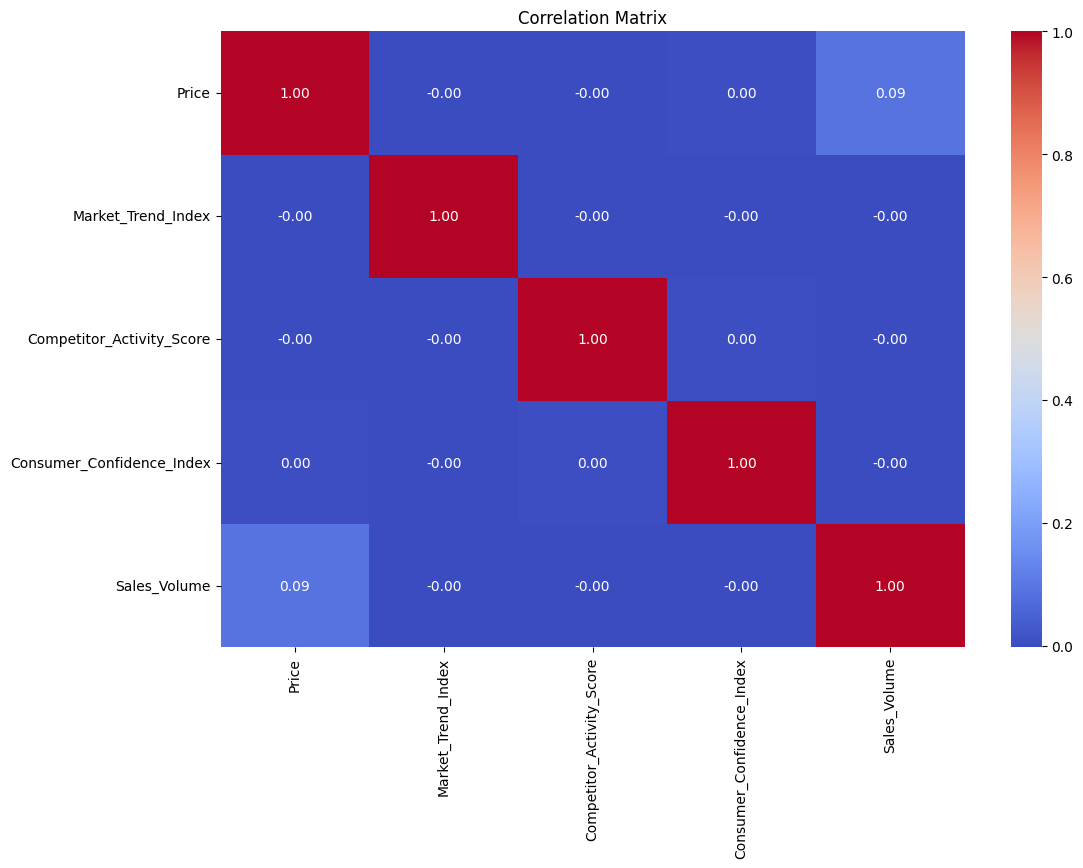

In [ ]:
num_cols = data.select_dtypes(include="number")
corr = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

multicollinearity between features does not exist in this dataset

**Feature 1: Total Amount**

- This is the product of the sales volume and the price
- Formula: Sales_Volume * Price

**Feature 2: RFM Scores**

- Measures the Recency, Frequency, and Monetary value of products

In [19]:
data['Total_Amount'] = data['Price'] * data['Sales_Volume']

In [20]:
# Define reference date (latest transaction date)
reference_date = data["Date"].max()

# Compute Recency (Days Since Last Purchase), Frequency, and Monetary Value
rfm = data.groupby("Product_ID").agg(
    Recency=("Date", lambda x: (reference_date - x.max()).days),
    Frequency=("Date", "count"),
    Monetary=("Total_Amount", "sum"),
)

data = data.merge(rfm, on="Product_ID", how="left")

In [21]:
data[['Recency', 'Frequency', 'Monetary']].isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

#### Lag Features:
Lag Strategy:

- 1-day lag: Yesterday's metrics (recent trend)
- 7-day lag: Last week's metrics (weekly pattern)
- 30-day lag: Last month's metrics (monthly pattern)

Features to Lag:
Sales_Volume → sales_volume_lag1, sales_volume_lag7, sales_volume_lag30

Price → price_lag1, price_lag7, price_lag30

Market_Trend_Index → market_trend_index_lag1, market_trend_index_lag7, market_trend_index_lag30

Competitor_Activity_Score → competitor_activity_score_lag1, competitor_activity_score_lag7, competitor_activity_score_lag30

Consumer_Confidence_Index → consumer_confidence_index_lag1, consumer_confidence_index_lag7, consumer_confidence_index_lag_30

In [22]:
data = data.sort_values(['Product_ID','Date'])

lag_columns = ['Sales_Volume', 'Price', 'Market_Trend_Index', 'Competitor_Activity_Score', 'Consumer_Confidence_Index']

for col in lag_columns:
    data[f'{col}_lag1'] = data.groupby(['Product_ID'])[col].shift(1)
    data[f'{col}_lag7'] = data.groupby(['Product_ID'])[col].shift(7)
    data[f'{col}_lag30'] = data.groupby(['Product_ID'])[col].shift(30)

lag_feature_cols = [c for c in data.columns if '_lag' in c]
data = data.dropna(subset=lag_feature_cols)

**Export Data**

In [23]:
data.to_csv(r"./cleaned_data.csv", index=False)